## Today, we are going to talk about installing 3rd party packages in python from pypi.org, and using a developmental index package to analyze a publicly available dataset.

#### The data we are looking at can be found at this [link](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE103334) from [this publication](https://www.cell.com/cell-reports/fulltext/S2211-1247(17)31314-1?_returnURL=https%3A%2F%2Flinkinghub.elsevier.com%2Fretrieve%2Fpii%2FS2211124717313141%3Fshowall%3Dtrue), where they sequenced microglia from normal mice and an Alzheimer's model (CKp25)


---

#### Question to answer: Is there any disruption in the developmental maturity of microglia in an alzheimer's disease model (CKp25)?

In [2]:
## start by importing the normal packages, as well as the newly-installed developmental_index package

from scipy import stats
import numpy as np
import pandas as pd
import developmental_index as dvp

In [3]:
## the 'dir' command allows us to look at all of the functions, or modules, contained within a given imported package

dir(dvp)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'developmental_index',
 'drop_unexpressed_genes',
 'extract_regulated_genes',
 'generate_index',
 'identify_significant_genes',
 'import_index',
 'remove_insignificant_rows',
 'scale_expression',
 'scale_index']

In [4]:
## time to import the expression matrix (I just downloaded the .txt file from GEO and converted it to CSV for easy import). also importing column 1 (gene labels) as the index

df = pd.read_csv('mathys2017_microglia_cpk25_GSE103334.csv', index_col = 0)

In [41]:
## for large datasets like this with many cells, it is useful to first remove any outlier columns (where the cells expression was way higher or way lower than the group average)
## this will make the scaling step more accurate and useful

df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

In [51]:
%%time

## first function in the new package! to calculate a maturity index, you must first scale the expression of all genes to between 0 and 1, so that no one gene contributes
## more to the index than any other


df_scaled = dvp.scale_expression(df)

Wall time: 23.7 s


In [52]:
df_scaled.head()

,CK_0w_m3_A1,CK_0w_m3_A10,CK_0w_m3_A11,CK_0w_m3_A12,CK_0w_m3_A2,CK_0w_m3_A3,CK_0w_m3_A4,CK_0w_m3_A5,CK_0w_m3_A6,CK_0w_m3_A7,...,CKp25_6w_m4_H11,CKp25_6w_m4_H12,CKp25_6w_m4_H2,CKp25_6w_m4_H3,CKp25_6w_m4_H4,CKp25_6w_m4_H5,CKp25_6w_m4_H6,CKp25_6w_m4_H7,CKp25_6w_m4_H8,CKp25_6w_m4_H9_0
GENES,,,,,,,,,,,,,,,,,,,,,
0610005C13Rik,0.005698,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
0610007P14Rik,0.017520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.302682,0.0,0.000000,0.0,0.0,0.0,0.247975,0.090294,0.258133,0.0
0610009B22Rik,0.018712,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.140274,...,0.000000,0.0,0.086198,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
0610009O20Rik,0.026005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.149845,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
0610010B08Rik,0.005914,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0


In [68]:
## now, since this data does not have index (gene) information attached to it, and the samples are not appropriate for calculating an index
## we will want to import an already produced dataframe containing microglia maturity index information. in this case, we will use the one from Richa's paper

df_index = pd.read_csv('unique_data_microglia_index_gene_list.csv', index_col = 0)

In [69]:
## this dataframe contains info for each gene that was significantly regulated across development, we will want to append this information to our expression matrix df

df_index.head()

,direction,valence
gene,,
mag,UP,4.582966
tmem63a,UP,3.441640
ier5,UP,3.274629
dusp6,UP,3.273920
serinc3,UP,3.215828


In [70]:
## it looks like we will need to make sure that we capitalize the gene names of this index so that they match up with the original expression

df_index.index = df_index.index.str.capitalize()

In [71]:
## to get relevant information about a package function that might be useful, you can call the function with a ?

dvp.import_index?

Signature: dvp.import_index(df, gene_list_df)
Docstring:
Just a quick merge of the main dataframe and an imported index gene list. Make sure that both dataframes have original gene IDs as the 
row indexes.

Args: Takes main dataframe and dataframe with index genes as the arguments.
File:      c:\programdata\anaconda3\lib\site-packages\developmental_index\developmental_index.py
Type:      function


In [72]:
## we will now combine the dataframes using the 'import_index' function

final = dvp.import_index(df_scaled, df_index)

In [73]:
## if this goes correctly, there should be around the same number of rows in the output as there were in the original expression matrix

final

,CK_0w_m3_A1,CK_0w_m3_A10,CK_0w_m3_A11,CK_0w_m3_A12,CK_0w_m3_A2,CK_0w_m3_A3,CK_0w_m3_A4,CK_0w_m3_A5,CK_0w_m3_A6,CK_0w_m3_A7,...,CKp25_6w_m4_H2,CKp25_6w_m4_H3,CKp25_6w_m4_H4,CKp25_6w_m4_H5,CKp25_6w_m4_H6,CKp25_6w_m4_H7,CKp25_6w_m4_H8,CKp25_6w_m4_H9_0,direction,valence
0610005C13Rik,0.005698,0.0,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,NaN,NaN
0610007P14Rik,0.017520,0.0,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.247975,0.090294,0.258133,0.000000,NaN,NaN
0610009B22Rik,0.018712,0.0,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.140274,...,0.086198,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,NaN,NaN
0610009O20Rik,0.026005,0.0,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.149845,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,NaN,NaN
0610010B08Rik,0.005914,0.0,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zyg11b,0.002309,0.0,0.00000,0.0,0.0,0.0,0.000000,0.002464,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000528,0.001158,NaN,NaN
Zyx,0.009054,0.0,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.089223,0.000000,...,0.000000,0.0,0.060326,0.0,0.000000,0.016895,0.011061,0.000000,NaN,NaN
Zzef1,0.020979,0.0,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.277782,0.000000,...,0.000000,0.0,0.027758,0.0,0.000000,0.000000,0.020310,0.008913,NaN,NaN
Zzz3,0.010766,0.0,0.05472,0.0,0.0,0.0,0.085853,0.252555,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,NaN,NaN


In [74]:
## for the next function, to calculate the index for each sample, we want to make sure we are giving it the correct column indices
## of all columns that represent samples

final.columns[0:-2]

Index(['CK_0w_m3_A1', 'CK_0w_m3_A10', 'CK_0w_m3_A11', 'CK_0w_m3_A12',
       'CK_0w_m3_A2', 'CK_0w_m3_A3', 'CK_0w_m3_A4', 'CK_0w_m3_A5',
       'CK_0w_m3_A6', 'CK_0w_m3_A7',
       ...
       'CKp25_6w_m4_H11', 'CKp25_6w_m4_H12', 'CKp25_6w_m4_H2',
       'CKp25_6w_m4_H3', 'CKp25_6w_m4_H4', 'CKp25_6w_m4_H5', 'CKp25_6w_m4_H6',
       'CKp25_6w_m4_H7', 'CKp25_6w_m4_H8', 'CKp25_6w_m4_H9_0'],
      dtype='object', length=2208)

In [111]:
## now that both dataframes are properly merged, we can generate the index value for each sample, passing the function the sample columns to analyze

raw_index = dvp.generate_index(final, final.columns[0:-2])

In [112]:
## since we will be scaling these index values to between 0-1 again, it will be useful to drop outliers

raw_index.loc[0] = raw_index.loc[0][raw_index.loc[0].between(raw_index.loc[0].quantile(.15), raw_index.loc[0].quantile(.85))]

In [113]:
raw_index

,CK_0w_m3_A1,CK_0w_m3_A10,CK_0w_m3_A11,CK_0w_m3_A12,CK_0w_m3_A2,CK_0w_m3_A3,CK_0w_m3_A4,CK_0w_m3_A5,CK_0w_m3_A6,CK_0w_m3_A7,...,CKp25_6w_m4_H11,CKp25_6w_m4_H12,CKp25_6w_m4_H2,CKp25_6w_m4_H3,CKp25_6w_m4_H4,CKp25_6w_m4_H5,CKp25_6w_m4_H6,CKp25_6w_m4_H7,CKp25_6w_m4_H8,CKp25_6w_m4_H9_0
0,1.680954,1.627205,1.681354,2.126139,1.620668,1.388071,1.383866,1.662696,NaN,1.421416,...,1.300833,NaN,1.636021,1.934253,1.758747,1.82773,NaN,1.506441,1.538681,2.041206


In [114]:
## once w we are done and comfortable with our raw index values, time to scale the index!

index = dvp.scale_index(raw_index)

In [115]:
index

,index,0
0,CK_0w_m3_A1,0.465611
1,CK_0w_m3_A10,0.409538
2,CK_0w_m3_A11,0.466029
3,CK_0w_m3_A12,0.930050
4,CK_0w_m3_A2,0.402718
...,...,...
2203,CKp25_6w_m4_H5,0.618735
2204,CKp25_6w_m4_H6,NaN
2205,CKp25_6w_m4_H7,0.283551
2206,CKp25_6w_m4_H8,0.317185


In [116]:
## this cell just contains some for loops for extracting the sample names into more discrete pieces, to make separate columns for each variable (i.e. group and time)

group = [0] * len(index)
i = -1

for x, value in index.iterrows():
    i = i + 1
    if 'CKp25' in value['index']:
        group[i] = 'Ckp25'
    else:
        group[i] = 'CK'
        
time = [0] * len(index)
i = -1

for x, value in index.iterrows():
    i = i + 1
    if '0w' in value['index']:
        time[i] = '0w'
    if '1w' in value['index']:
        time[i] = '1w'
    if '2w' in value['index']:
        time[i] = '2w'
    if '3w' in value['index']:
        time[i] = '3w'
    if '6w' in value['index']:
        time[i] = '6w'
        
index['group'] = group
index['time'] = time

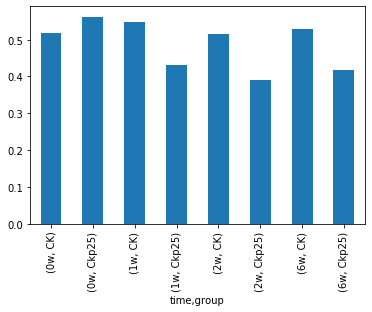

In [117]:
## now we can use a really quick 1-liner to plot the dataframe grouped by our two variables of interest
## looks like we might have a difference between CK and CKp25 at the older time points!

index.groupby(['time', 'group'])[0].mean().plot(kind = 'bar');

In [118]:
## you can take the .plot() method off the end to just print out the average values

index.groupby(['time', 'group'])[0].mean()

time  group
0w    CK       0.516854
      Ckp25    0.562741
1w    CK       0.547201
      Ckp25    0.430063
2w    CK       0.516409
      Ckp25    0.390952
6w    CK       0.529290
      Ckp25    0.418309
Name: 0, dtype: float64

In [109]:
## my next steps are always to export the tidyed dataset to csv, so that I can import it into R (where I am more comfortable graphing and doing stats)

index.to_csv('E:\\DATA\\rna_seq_datasets\\mathys2017_microglia_disease_models\\index_output_for_analysis_200601.csv')